In [8]:
import pymc as pm
import numpy as np
from pymc.initial_point import make_initial_point_fns_per_chain

with pm.Model() as model:
    # Define a mixture prior
    w = np.array([0.5, 0.5])  # Mixture weights
    components = [pm.Normal.dist(-3, 1), pm.Normal.dist(3, 1)]
    x = pm.Mixture("x", w=w, comp_dists=components)

    num_chains = 4  # Number of chains

    # Manually sample initial values from the prior
    prior_samples = [x.eval() for _ in range(num_chains)]  # Draw from the prior

    # Explicitly set initial values
    initvals = [{"x": prior_samples[i]} for i in range(num_chains)]

    # Create initialization functions with manual overrides
    init_fns = make_initial_point_fns_per_chain(model=model, overrides=initvals, chains=num_chains)

# Generate initial values for each chain
init_values = [init_fn(seed=i) for i, init_fn in enumerate(init_fns)]
print(init_values)


[{'x': array(3.71511499)}, {'x': array(3.71511499)}, {'x': array(3.71511499)}, {'x': array(3.71511499)}]


In [22]:

weights = (2,2)

# Normalize weights
weights = np.array(weights) / np.sum(weights)

weights = np.array(weights)

print(weights)

[0.5 0.5]


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [slope]
>Metropolis: [intercept]
>Metropolis: [sigma]


Output()

/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: 
RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


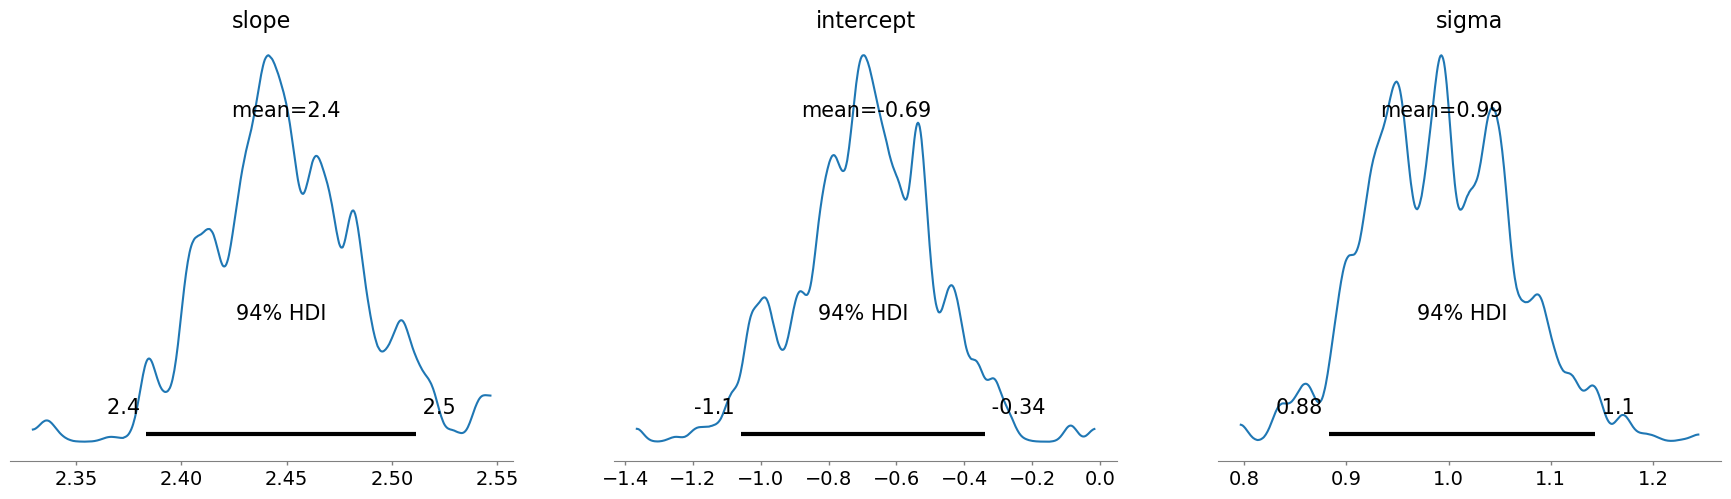

In [69]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt


# Initialize random number generator
#rng = np.random.default_rng(42) 
X = np.linspace(0, 10, 100)
true_slope = 2.5
true_intercept = -1.0
y = true_slope * X + true_intercept + np.random.normal(0, 1, size=len(X))  # Adding noise

# Define the PyMC model
with pm.Model() as linear_model:
    # Priors for slope and intercept
    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    
    # Prior for noise (likelihood standard deviation)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Linear model
    mu = slope * X + intercept
    
    # Likelihood (observed data)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    step = pm.Metropolis()

    # Inference: Sample from posterior
    trace = pm.sample(2000, chains=1, cores=1, step=step, random_seed=132)

# Visualize results
az.plot_posterior(trace, var_names=["slope", "intercept", "sigma"])
plt.show()
